In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv(r'C:\Users\dvale\TFM\Data\all_variables.csv')

In [109]:
print(data.shape)
print(data.columns)

(39852, 20)
Index(['Unnamed: 0', 'id', 'weight', 'material_deprivation', 'sex', 'age',
       'civil_status', 'familial_status', 'region', 'population_density',
       'citizenship', 'tenure_status', 'education_level', 'working_status',
       'working_status_agg', 'occupation', 'economic_sector', 'years_worked',
       'hours_week_worked', 'income'],
      dtype='object')


In [110]:
data = data.drop(['Unnamed: 0', 'id', 'weight', 'economic_sector'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39852 entries, 0 to 39851
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   material_deprivation  39852 non-null  object 
 1   sex                   39852 non-null  object 
 2   age                   39852 non-null  int64  
 3   civil_status          39852 non-null  object 
 4   familial_status       39852 non-null  object 
 5   region                39852 non-null  object 
 6   population_density    39852 non-null  object 
 7   citizenship           39852 non-null  object 
 8   tenure_status         39852 non-null  object 
 9   education_level       39852 non-null  object 
 10  working_status        39852 non-null  object 
 11  working_status_agg    39852 non-null  object 
 12  occupation            39852 non-null  object 
 13  years_worked          39852 non-null  int64  
 14  hours_week_worked     39852 non-null  int64  
 15  income             

In [111]:
data.working_status.unique()

array(['Retired', 'Unpaid carer/domestic worker',
       'Disabled/unfit to work', 'Unemployed', 'Student', 'Employed',
       'Self-employed', 'Minor'], dtype=object)

In [112]:
data.working_status = np.where(data.working_status == 'Self-employed', 'Employed', data.working_status)
data.working_status.unique()

array(['Retired', 'Unpaid carer/domestic worker',
       'Disabled/unfit to work', 'Unemployed', 'Student', 'Employed',
       'Minor'], dtype=object)

In [113]:
data = data.drop(['working_status_agg'], axis=1)

In [114]:
scaler = StandardScaler()

num_var = data[['age', 'years_worked', 'hours_week_worked', 'income']]
scaler.fit(num_var)
scaled_var = pd.DataFrame(scaler.transform(num_var), columns=num_var.columns)

data.age = scaled_var.age
data.years_worked = scaled_var.years_worked
data.years_worked = scaled_var.years_worked
data.income = scaled_var.income

data.head()

,material_deprivation,sex,age,civil_status,familial_status,region,population_density,citizenship,tenure_status,education_level,working_status,occupation,years_worked,hours_week_worked,income
0,No,Male,1.088573,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Clerical Support Workers,1.831752,0,-0.085328
1,No,Female,1.002616,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Unpaid carer/domestic worker,Clerical Support Workers,-0.922952,0,-0.085328
2,No,Female,1.174531,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Lower secondary education,Unpaid carer/domestic worker,Elementary Occupations,0.178930,0,0.367549
3,No,Male,0.658786,Married,No,Basque Country,Thinly-populated area,Spain,Outright owner,Upper secondary education,Retired,Services and Sales Workers,1.097164,0,0.367549
4,No,Female,0.400914,Divorced,Yes,Basque Country,Thinly-populated area,Spain,Outright owner,Higher education,Disabled/unfit to work,Services and Sales Workers,0.791086,0,-1.133343


In [115]:
def get_dummies(df):
    new_df = pd.DataFrame()
    for c in df.columns:
        if type(df[c][0]) == type('string'):
            dummy_df = pd.get_dummies(df[c])
            for dummy_column in dummy_df.columns:
                new_df[c + '_' + dummy_column] = dummy_df[dummy_column]
        else:
            new_df[c] = df[c]
    return new_df

In [116]:
data_final = get_dummies(data[data.columns[1:]])

data_final.head()

,sex_Female,sex_Male,age,civil_status_Divorced,civil_status_Married,civil_status_Married 'de facto',civil_status_Minor,civil_status_Never married,civil_status_Separated,civil_status_Widowed,...,occupation_Food Preparation Assistants,occupation_Managers,occupation_Plant and Machine Operators and Assemblers,occupation_Professionals,occupation_Services and Sales Workers,"occupation_Skilled Agricultural, Forestry and Fishery Workers",occupation_Technicians and Associate Professionals,years_worked,hours_week_worked,income
0,0,1,1.088573,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.831752,0,-0.085328
1,1,0,1.002616,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.922952,0,-0.085328
2,1,0,1.174531,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.178930,0,0.367549
3,0,1,0.658786,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1.097164,0,0.367549
4,1,0,0.400914,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.791086,0,-1.133343


In [117]:
data_final['is_minor'] = data_final.civil_status_Minor
data_final = data_final.drop(['civil_status_Minor', 
                               'working_status_Minor', 
                               'education_level_Minor'], axis=1)

In [118]:
data_final['material_deprivation'] = data.material_deprivation.map({'Yes': 1, 'No': 0})

count_yes = len(data_final[data_final.material_deprivation == 1])
count_no = len(data_final[data_final.material_deprivation == 0])
freq_yes = (count_yes/(count_yes+count_no))*100
freq_no = (count_no/(count_yes+count_no))*100

print('''Has material deprivation: {}%
Does not have material deprivation: {}%'''.format(round(freq_yes, 2), round(freq_no, 2)))

Has material deprivation: 4.61%
Does not have material deprivation: 95.39%


In [119]:
X = data_final.drop(['material_deprivation'], axis=1)
y = data_final.material_deprivation

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [120]:
training_data = X_train.copy()
training_data['material_deprivation'] = y_train.copy()
training_data_us = pd.concat([training_data[training_data.material_deprivation == 1], 
                              training_data[training_data.material_deprivation == 0].sample(frac=0.0461)]).sample(frac=1)

X_train_us = training_data_us.drop(['material_deprivation'], axis=1)
y_train_us = training_data_us.material_deprivation

In [121]:
decision_tree = DecisionTreeClassifier()

rfe = RFE(decision_tree)
rfe = rfe.fit(X_train_us, y_train_us)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True False False False  True  True False  True
 False False False  True False  True False False  True False  True  True
  True False False False False  True  True  True  True False False  True
 False  True  True  True  True  True  True  True  True  True  True False
 False False  True  True False False False False  True False False  True
 False False False False  True  True  True False]
[ 1 12  1  6  1 15 29 16  1  1 28  1 30 21  2  1 19  1  4 10  1 26  1  1
  1 25 17 33 13  1  1  1  1  5 20  1  3  1  1  1  1  1  1  1  1  1  1 24
 14 32  1  1 18 27 11  7  1 34 31  1 22  8  9 23  1  1  1 35]


In [122]:
selected_columns = [X_train.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i] == True]
selected_columns

['sex_Female',
 'age',
 'civil_status_Married',
 'civil_status_Widowed',
 'familial_status_No',
 'region_Andalusia',
 'region_Basque Country',
 'region_Cantabria',
 'region_Catalonia',
 'region_Comunity of Madrid',
 'region_Extremadura',
 'region_Galicia',
 'region_Valencian Community',
 'population_density_Densely-populated area',
 'population_density_Intermediate area',
 'population_density_Thinly-populated area',
 'citizenship_Spain',
 'tenure_status_Accommodation is provided free',
 'tenure_status_Accommodation is rented at a reduced rate (lower price than the market price)',
 'tenure_status_Outright owner',
 'tenure_status_Owner paying mortgage',
 'tenure_status_Tenant or subtenant paying rent at prevailing or market rate',
 'education_level_Higher education',
 'education_level_Lower secondary education',
 'education_level_Pre-primary education',
 'education_level_Primary education',
 'education_level_Upper secondary education',
 'working_status_Student',
 'working_status_Unemploy

In [123]:
X_train_us = X_train_us[selected_columns]
X_test = X_test[selected_columns]

decision_tree = DecisionTreeClassifier(criterion='entropy').fit(X_train_us, y_train_us)

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      9512
           1       0.13      0.78      0.23       451

    accuracy                           0.76      9963
   macro avg       0.56      0.77      0.54      9963
weighted avg       0.95      0.76      0.83      9963



In [124]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7201 2311]
 [  97  354]]


In [103]:
proba_material_deprivation = [proba[1] for proba in decision_tree.predict_proba(X_test)]

In [104]:
testing_data = X_test.copy()
testing_data['material_deprivation'] = y_test.copy()
testing_data['proba_material_deprivation'] = proba_material_deprivation

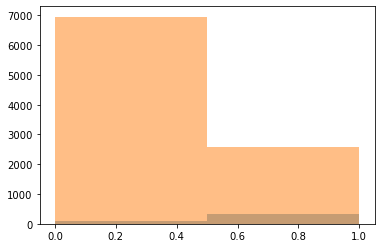

In [106]:
plt.hist(x='proba_material_deprivation', bins=2, data=testing_data[testing_data.material_deprivation == 1].reset_index(), 
         alpha=0.5, density=False)
plt.hist(x='proba_material_deprivation', bins=2, data=testing_data[testing_data.material_deprivation == 0].reset_index(), 
         alpha=0.5, density=False);